In [3]:
#Importar Librerias Carga de dataset y una exploracion inicial
import pandas as pd
import numpy as np


file_path = "Resultados_únicos_Saber_11_20250927.csv"
df = pd.read_csv(file_path, low_memory=False)


print("Dimensiones del dataset:", df.shape)
print("\nColumnas disponibles:\n", df.columns.tolist()[:20], "...")  # solo muestra primeras 20
print("\nTipos de datos:\n", df.dtypes.head(10))  # primeros 10 tipos

# Vista rápida
df.head(10)


Dimensiones del dataset: (7109704, 51)

Columnas disponibles:
 ['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL'] ...

Tipos de datos:
 PERIODO                            int64
ESTU_TIPODOCUMENTO                object
ESTU_CONSECUTIVO                  object
COLE_AREA_UBICACION               object
COLE_BILINGUE                     object
COLE_CALENDARIO                   object
COLE_CARACTER                     object
COLE_COD_DANE_ESTABLECIMIENTO    float64
COLE_COD_DANE_SEDE               float64
COLE_COD_DEPTO_UBICACION         float64
dtype: object


,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,3.118480e+11,3.118480e+11,11.0,...,Si,Si,Si,B+,94,88,NaN,NaN,NaN,NaN
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71,66,70.0,65.0,69.0,339.0
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71,66,70.0,65.0,69.0,339.0
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,1.631300e+11,1.631300e+11,63.0,...,Si,Si,No,A1,48,45,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320464198,URBANO,N,A,TÉCNICO,1.190010e+11,1.190010e+11,19.0,...,Si,Si,Si,A-,43,52,NaN,NaN,NaN,NaN
5,20194,TI,SB11201940562856,URBANO,N,A,TÉCNICO/ACADÉMICO,1.413960e+11,1.413960e+11,41.0,...,No,No,No,A-,46,43,31.0,40.0,43.0,199.0
6,20194,TI,SB11201940562856,URBANO,N,A,TÉCNICO/ACADÉMICO,1.413960e+11,1.413960e+11,41.0,...,No,No,No,A-,46,43,31.0,40.0,43.0,199.0
7,20162,TI,SB11201620084846,URBANO,N,A,TÉCNICO/ACADÉMICO,1.760010e+11,1.760010e+11,76.0,...,Si,Si,Si,A2,59,57,46.0,57.0,57.0,272.0
8,20132,TI,SB11201320184630,RURAL,N,A,TÉCNICO/ACADÉMICO,2.733190e+11,2.733190e+11,73.0,...,No,No,No,A-,33,34,NaN,NaN,NaN,NaN
9,20172,TI,SB11201720518410,URBANO,N,A,TÉCNICO/ACADÉMICO,4.050010e+11,4.050010e+11,5.0,...,No,Si,Si,A-,44,53,54.0,44.0,54.0,253.0


# Hipótesis y plan de análisis  

## Hipótesis principal  
Las características del colegio (ubicación, naturaleza, calendario, bilingüismo) influyen significativamente en los resultados de Saber 11.  

---

## Subhipótesis  
1. Estudiantes de **urbano > rural**.  
2. Estudiantes de **privado > público**.  
3. Estudiantes de **calendario B > calendario A**.  
4. Estudiantes de **bilingüe > no bilingüe**.  

---

## Preguntas clave  
- ¿Cómo varían los puntajes promedio por ubicación, naturaleza, calendario y bilingüismo?  
- ¿Qué variable explica más la desigualdad en puntajes?  
- ¿Podemos estimar el puntaje global con un modelo simple?  

---

## Variables  
- **Dependientes:** Puntajes por área + Puntaje global.  
- **Independientes:**  
  - `COLE_AREA_UBICACION` (Urbano/Rural)  
  - `COLE_NATURALEZA` (Oficial/No oficial)  
  - `COLE_CALENDARIO` (A/B)  
  - `COLE_BILINGUE` (Sí/No)  

---

## 🧭 Plan de trabajo  
1. **EDA**  
   - Tamaños de muestra  
   - Valores faltantes  
   - Distribuciones de puntajes  

2. **Comparaciones estadísticas**  
   - Medias por grupo (t-test / ANOVA)  

3. **Visualización**  
   - Boxplots  
   - Mapas de calor / correlaciones  

4. **Modelo predictivo**  
   - Regresión lineal o árbol de decisión para explicar puntajes  

---


In [4]:

#Exploración básica del dataset


# Dimensiones
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])

# Primeras filas
display(df.head(3))

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes.value_counts())

# Resumen de columnas
print("\nNombres de columnas:")
print(df.columns.tolist())

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# Estadísticas básicas de los puntajes
cols_puntajes = [
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]

print("\nEstadísticas descriptivas de puntajes:")
display(df[cols_puntajes].describe())


Número de filas: 7109704
Número de columnas: 51


,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,3.118480e+11,3.118480e+11,11.0,...,Si,Si,Si,B+,94,88,NaN,NaN,NaN,NaN
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71,66,70.0,65.0,69.0,339.0
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71,66,70.0,65.0,69.0,339.0



Tipos de datos:
object     37
float64    13
int64       1
Name: count, dtype: int64

Nombres de columnas:
['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE', 'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO', 'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PE

,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_GLOBAL
count,4.500181e+06,4.500181e+06,4.500181e+06,4.500181e+06
mean,5.218494e+01,5.010606e+01,4.886536e+01,2.523033e+02
std,1.038577e+01,1.056959e+01,1.173056e+01,5.042668e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+01,4.200000e+01,4.000000e+01,2.150000e+02
50%,5.200000e+01,5.000000e+01,4.900000e+01,2.490000e+02
75%,6.000000e+01,5.700000e+01,5.700000e+01,2.870000e+02
max,1.000000e+02,1.000000e+02,1.000000e+02,4.950000e+02


## Hipótesis de trabajo

Con base en el contexto de desigualdad y factores de éxito en las pruebas Saber 11, se plantean las siguientes hipótesis que guiarán el análisis:

1. **Desigualdad urbano vs rural**  
   - Hipótesis: Los estudiantes de colegios **urbanos** obtienen, en promedio, un puntaje global significativamente mayor que los de colegios **rurales**.  
   - Variables clave: `COLE_AREA_UBICACION`, `PUNT_GLOBAL`.

2. **Impacto del bilingüismo**  
   - Hipótesis: Los colegios **bilingües** presentan mejores resultados en el Saber 11 que los colegios no bilingües.  
   - Variables clave: `COLE_BILINGUE`, `PUNT_GLOBAL`.

3. **Nivel socioeconómico y educación de los padres**  
   - Hipótesis: A mayor **estrato socioeconómico** y **nivel educativo de los padres**, mayor es el puntaje global del estudiante.  
   - Variables clave: `FAMI_ESTRATOVIVIENDA`, `FAMI_EDUCACIONPADRE`, `FAMI_EDUCACIONMADRE`, `PUNT_GLOBAL`.

4. **Diferencias por calendario escolar**  
   - Hipótesis: Los estudiantes de colegios con **Calendario B** (común en instituciones privadas) obtienen mejores resultados que los de **Calendario A**.  
   - Variables clave: `COLE_CALENDARIO`, `PUNT_GLOBAL`.

---

Estas hipótesis orientarán las siguientes fases del análisis:  
- **Fase 2 (Preparación):** la limpieza de datos priorizará estas variables clave.  
- **Fase 3 (EDA):** se explorarán estas relaciones mediante estadísticas descriptivas, agrupaciones y visualizaciones.  
- **Fase 4 (Modelado):** se probarán modelos que permitan estimar el puntaje global a partir de las variables socioeconómicas y escolares.  


In [5]:


import pandas as pd

# --- 1. Selección de variables relevantes ---
variables_clave = [
    'PERIODO',
    'PUNT_GLOBAL',
    'PUNT_LECTURA_CRITICA',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES',
    'PUNT_MATEMATICAS',
    'COLE_AREA_UBICACION',
    'COLE_BILINGUE',
    'COLE_CALENDARIO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENELAVADORA'
]



df_clean = df[variables_clave].copy()

# --- 2. Revisión de valores nulos ---
print("Valores nulos por variable:")
print(df_clean.isnull().sum())

# --- 3. Homogeneización de categorías ---
df_clean['COLE_AREA_UBICACION'] = df_clean['COLE_AREA_UBICACION'].str.upper().replace({
    'URBANO': 'URBANO',
    'RURAL': 'RURAL'
})

df_clean['COLE_BILINGUE'] = df_clean['COLE_BILINGUE'].replace({'N': 'NO', 'S': 'SI'})

df_clean['COLE_CALENDARIO'] = df_clean['COLE_CALENDARIO'].replace({'A': 'CAL_A', 'B': 'CAL_B'})

# --- 4. Conversión de tipos de datos ---
for col in ['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 
            'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
    df_clean[col] = df_clean[col].astype('category')

# --- 5. Filtrar registros no válidos ---
df_clean = df_clean[df_clean['PUNT_GLOBAL'] > 0]

print(f"✅ Dataset limpio con {df_clean.shape[0]} filas y {df_clean.shape[1]} columnas")


Valores nulos por variable:
PERIODO                           0
PUNT_GLOBAL                 2609523
PUNT_LECTURA_CRITICA        2609523
PUNT_C_NATURALES            2609523
PUNT_SOCIALES_CIUDADANAS    2609523
PUNT_INGLES                    4179
PUNT_MATEMATICAS                  0
COLE_AREA_UBICACION            3031
COLE_BILINGUE                916870
COLE_CALENDARIO                1536
FAMI_ESTRATOVIVIENDA         218219
FAMI_EDUCACIONPADRE          212423
FAMI_EDUCACIONMADRE          212826
FAMI_TIENEINTERNET           191624
FAMI_TIENECOMPUTADOR         151217
FAMI_TIENELAVADORA           128086
dtype: int64
✅ Dataset limpio con 4500067 filas y 16 columnas


Estadísticas descriptivas de puntajes:


,PUNT_GLOBAL,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS
count,4.500067e+06,4.500067e+06,4.500067e+06,4.500067e+06
mean,2.523097e+02,5.218626e+01,5.010733e+01,4.886660e+01
std,5.041133e+01,1.038258e+01,1.056671e+01,1.172813e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.150000e+02,4.500000e+01,4.200000e+01,4.000000e+01
50%,2.490000e+02,5.200000e+01,5.000000e+01,4.900000e+01
75%,2.870000e+02,6.000000e+01,5.700000e+01,5.700000e+01
max,4.950000e+02,1.000000e+02,1.000000e+02,1.000000e+02



Matriz de correlación:
                          PUNT_GLOBAL  PUNT_LECTURA_CRITICA  PUNT_C_NATURALES  \
PUNT_GLOBAL                  1.000000              0.891525          0.913467   
PUNT_LECTURA_CRITICA         0.891525              1.000000          0.741832   
PUNT_C_NATURALES             0.913467              0.741832          1.000000   
PUNT_SOCIALES_CIUDADANAS     0.909230              0.776316          0.787804   
PUNT_INGLES                  0.788085              0.667632          0.696256   

                          PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  
PUNT_GLOBAL                               0.909230     0.788085  
PUNT_LECTURA_CRITICA                      0.776316     0.667632  
PUNT_C_NATURALES                          0.787804     0.696256  
PUNT_SOCIALES_CIUDADANAS                  1.000000     0.676275  
PUNT_INGLES                               0.676275     1.000000  


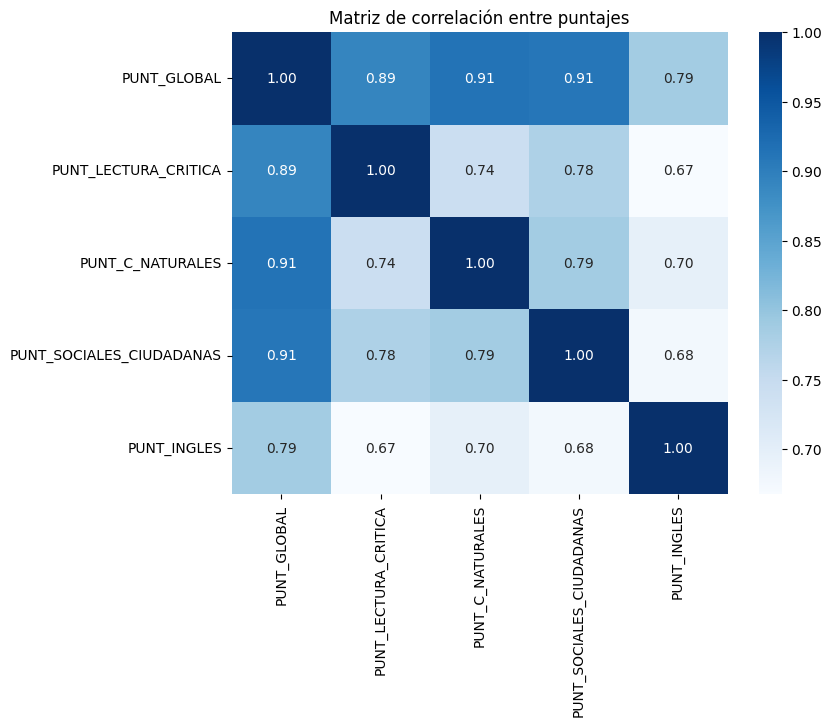

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Estadísticas descriptivas ---
print("Estadísticas descriptivas de puntajes:")
display(df_clean[[
    'PUNT_GLOBAL', 
    'PUNT_LECTURA_CRITICA', 
    'PUNT_C_NATURALES', 
    'PUNT_SOCIALES_CIUDADANAS'
]].describe())

# --- 2. Matriz de correlación ---
corr = df_clean[[
    'PUNT_GLOBAL', 
    'PUNT_LECTURA_CRITICA', 
    'PUNT_C_NATURALES', 
    'PUNT_SOCIALES_CIUDADANAS', 
    'PUNT_INGLES'
]].corr()

print("\nMatriz de correlación:")
print(corr)

# --- 3. Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre puntajes")
plt.show()


c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

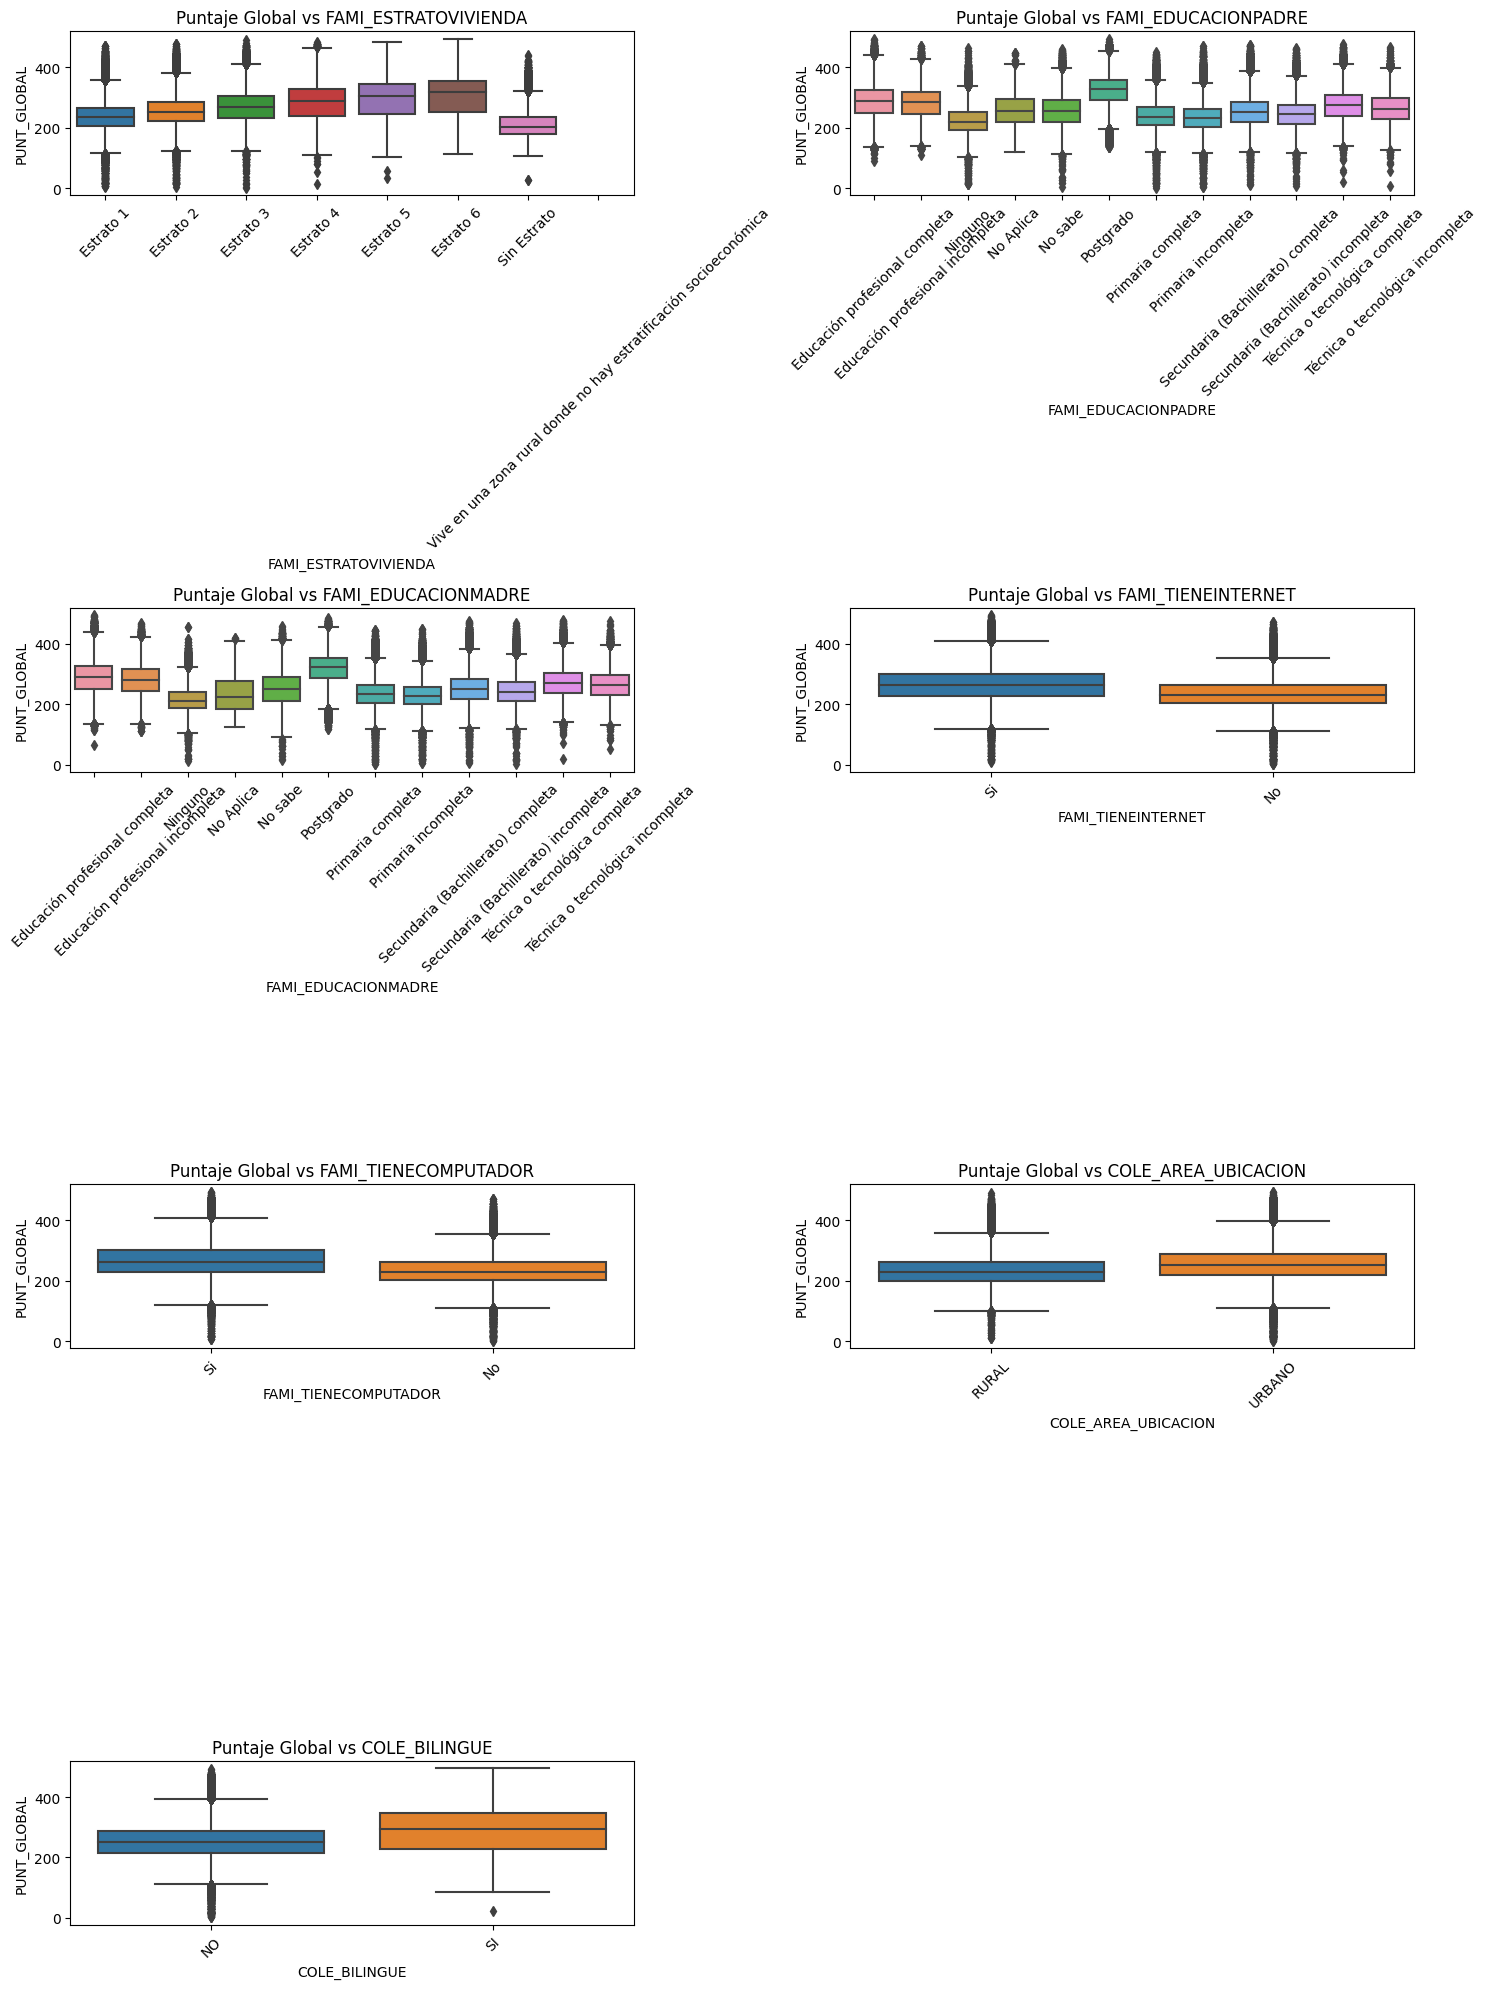

C:\Users\usuario 1\AppData\Local\Temp\ipykernel_15968\183348492.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='PUNT_GLOBAL', data=df_clean, estimator=lambda x: x.mean(), ci=None, ax=axes[i])
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\usuario 1\AppData\Local\Temp\ipykernel_15968\183348492.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='PUNT_GLOBAL', data=df_clean, estimator=lambda x: x.mean(), ci=None, ax=axes[i])
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn

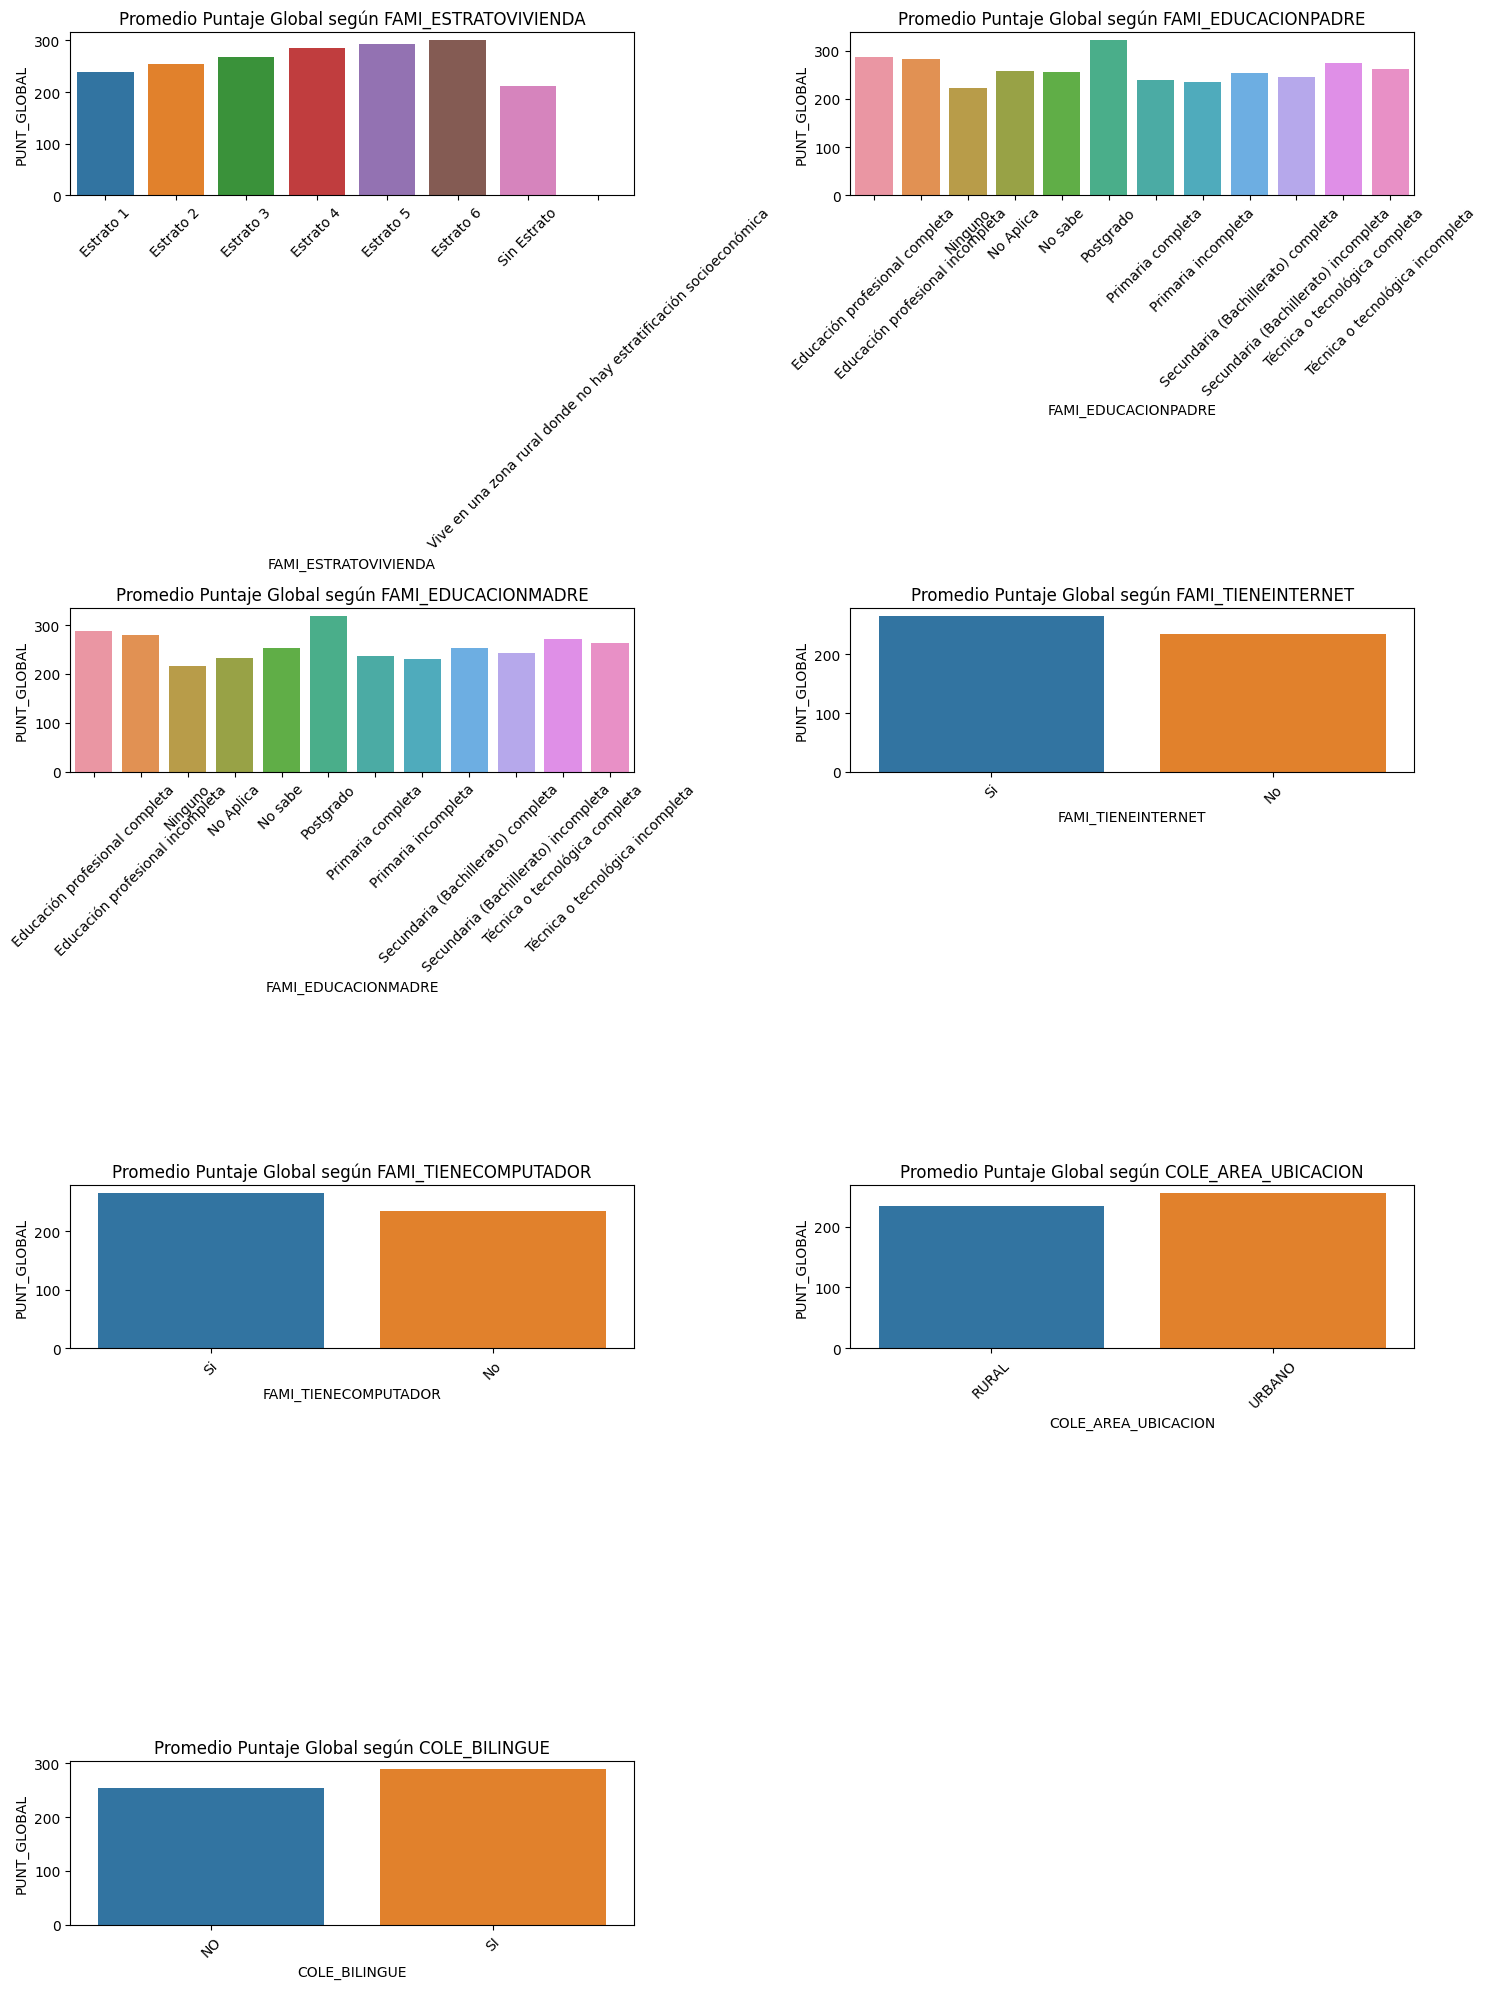

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables socioeconómicas de interés
variables_categoricas = [
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENECOMPUTADOR',
    'COLE_AREA_UBICACION',
    'COLE_BILINGUE'
]

# --- Boxplots agrupados ---
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20)) 
axes = axes.flatten()  

for i, var in enumerate(variables_categoricas):
    sns.boxplot(x=var, y='PUNT_GLOBAL', data=df_clean, ax=axes[i])
    axes[i].set_title(f"Puntaje Global vs {var}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Elimina los ejes sobrantes si la cantidad no cuadra exacto
for j in range(len(variables_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# --- Promedios agrupados ---
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables_categoricas):
    sns.barplot(x=var, y='PUNT_GLOBAL', data=df_clean, estimator=lambda x: x.mean(), ci=None, ax=axes[i])
    axes[i].set_title(f"Promedio Puntaje Global según {var}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(variables_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


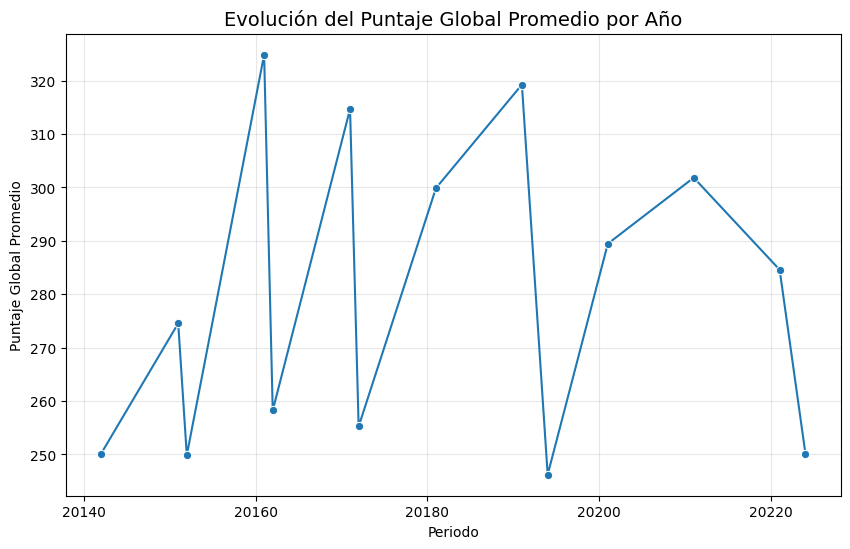

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Promedio de puntaje global por periodo
puntajes_por_periodo = df_clean.groupby("PERIODO")["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="PERIODO", y="PUNT_GLOBAL", data=puntajes_por_periodo, marker="o")
plt.title("Evolución del Puntaje Global Promedio por Año", fontsize=14)
plt.xlabel("Periodo")
plt.ylabel("Puntaje Global Promedio")
plt.grid(True, alpha=0.3)
plt.show()


C:\Users\usuario 1\AppData\Local\Temp\ipykernel_15968\1680299476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  puntajes_urb_rur = df_clean.groupby(["PERIODO", "COLE_AREA_UBICACION"])["PUNT_GLOBAL"].mean().reset_index()
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_in

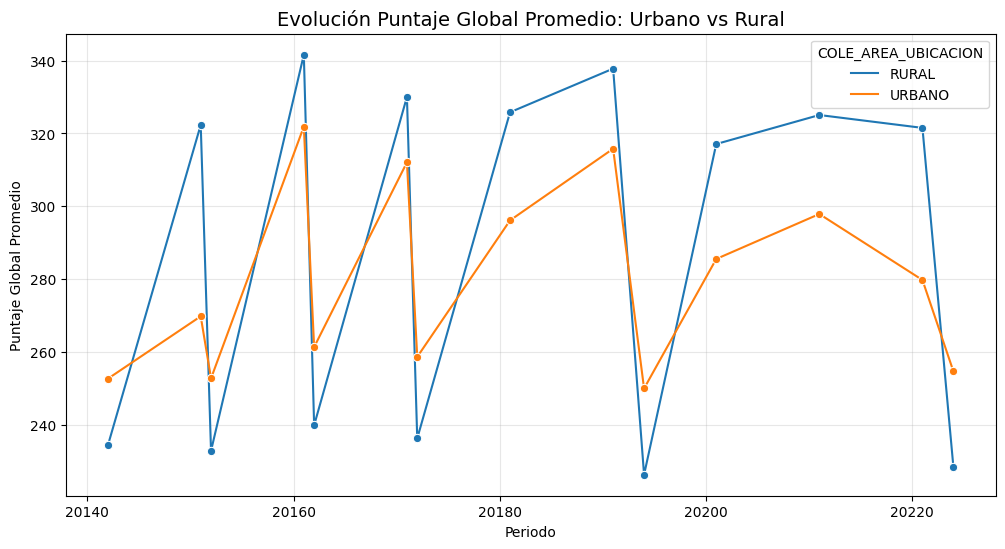

In [9]:
# Promedio por periodo y ubicación
puntajes_urb_rur = df_clean.groupby(["PERIODO", "COLE_AREA_UBICACION"])["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="PERIODO", y="PUNT_GLOBAL", hue="COLE_AREA_UBICACION", data=puntajes_urb_rur, marker="o")
plt.title("Evolución Puntaje Global Promedio: Urbano vs Rural", fontsize=14)
plt.xlabel("Periodo")
plt.ylabel("Puntaje Global Promedio")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:

# Guardar una muestra representativa del dataset limpio
df_sample = df_clean.sample(n=50000, random_state=42)  
df_sample.to_csv("datos_saber11_clean.csv", index=False)
print("✅ Muestra guardada como 'datos_saber11_clean.csv'")


✅ Muestra guardada como 'datos_saber11_clean.csv'


# 📊 Análisis Exploratorio de Datos (EDA) – Puntajes Globales  

## 1. Objetivo del EDA  
Explorar cómo variables socioeconómicas, educativas y contextuales se relacionan con el puntaje global de los estudiantes, además de analizar su evolución temporal.  

---

## 2. Variables Clave Analizadas  

### 🔹 Socioeconómicas  
- Estrato de vivienda (`FAMI_ESTRATOVIVIENDA`)  
- Educación del padre (`FAMI_EDUCACIONPADRE`)  
- Educación de la madre (`FAMI_EDUCACIONMADRE`)  
- Acceso a internet (`FAMI_TIENEINTERNET`)  
- Tener computador en casa (`FAMI_TIENECOMPUTADOR`)  

### 🔹 Escolares  
- Ubicación del colegio (`COLE_AREA_UBICACION`)  
- Bilingüismo (`COLE_BILINGUE`)  

### 🔹 Temporales  
- Año de aplicación (`PERIODO`)  

---

## 3. Principales Hallazgos  

### 🔹 Estrato socioeconómico  
- Existe una **relación positiva**: a mayor estrato, mayores puntajes globales.  
- Sin embargo, se observa **alta dispersión** dentro de cada estrato → no es un factor determinante único.  

### 🔹 Educación de los padres  
- Padres con **educación profesional o posgrado** → hijos con puntajes significativamente más altos.  
- Padres con **primaria o secundaria incompleta** → hijos con promedios más bajos.  
- La **educación de los padres** parece ser uno de los predictores más fuertes.  

### 🔹 Acceso a internet y computador  
- Sí tienen internet/computador → puntajes más altos.  
- No tienen → puntajes más bajos, aunque la diferencia **no es tan marcada** como en educación de los padres.  

### 🔹 Área y bilingüismo del colegio  
- **Colegios urbanos > rurales** en puntajes promedio.  
- **Colegios bilingües > no bilingües**, mostrando una clara ventaja en desempeño.  

---

## 4. Evolución Temporal (PERIODO)  

- Los puntajes globales muestran **fluctuaciones importantes**:  
  - Caídas bruscas en **2015-2016** y en **2019**.  
  - Recuperación en **2020-2021**, aunque no se alcanza un crecimiento sostenido.  

- Comparación **urbano vs rural**:  
  - Los **urbanos mantienen ventaja constante** sobre los rurales.  
  - En algunos años la brecha se reduce, pero **nunca desaparece**.  

---

## 5. Conclusiones del EDA  

- El **contexto socioeconómico y educativo familiar** influye fuertemente en el desempeño académico.  
- El **acceso a recursos tecnológicos** (internet y computador) marca diferencias, aunque no tan grandes como el nivel educativo de los padres.  
- Las **condiciones del colegio** (ubicación y bilingüismo) también tienen un impacto relevante.  
- La **evolución temporal** sugiere que hay factores externos (posiblemente reformas, coyunturas sociales/económicas, pandemia) que afectan significativamente los resultados en ciertos años.  
- La **brecha urbano-rural** sigue siendo persistente en el sistema educativo.  

---

👉 Este análisis exploratorio sienta la base para:  
- Modelos predictivos de desempeño.  
- Políticas públicas educativas orientadas a cerrar **brechas socioeconómicas y geográficas**.  
- Profundizar en **desigualdades regionales** y en áreas específicas del conocimiento.  


## 📌 Fase 3: Modelado – Relación entre Variables y Desempeño

En esta fase implementaremos modelos predictivos para analizar cómo factores socioeconómicos, educativos y contextuales influyen en el puntaje global de los estudiantes.  

El objetivo es:
- Identificar cuáles variables explican mejor el desempeño.
- Evaluar la capacidad predictiva de los modelos.
- Interpretar la importancia de cada factor para fundamentar recomendaciones.  

Se aplicarán **dos enfoques**:
1. **Regresión Lineal** → Para interpretar la relación directa entre variables y puntajes.  
2. **Random Forest** → Para capturar relaciones no lineales y obtener la importancia de las variables.  

Los resultados nos permitirán entender qué factores tienen mayor peso en el rendimiento académico y sentar bases para decisiones educativas.


In [11]:
# --- 1. Preparación de datos ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Variables predictoras (X) y objetivo (y)
X = df_clean[['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
              'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 
              'COLE_AREA_UBICACION', 'COLE_BILINGUE']]
y = df_clean['PUNT_GLOBAL']

# One Hot Encoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# --- 2. Modelo de Regresión Lineal ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)

# Métricas
print("Regresión Lineal:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# Coeficientes para interpretación
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_reg.coef_
}).sort_values(by="Coeficiente", ascending=False)
print(coef)


Regresión Lineal:
R²: 0.22497283893979259
MAE: 35.74304289620527
RMSE: 44.363222995491256
                                             Variable   Coeficiente
11                      FAMI_EDUCACIONPADRE_Postgrado  2.766790e+01
4                      FAMI_ESTRATOVIVIENDA_Estrato 6  2.284772e+01
22                      FAMI_EDUCACIONMADRE_Postgrado  2.260686e+01
3                      FAMI_ESTRATOVIVIENDA_Estrato 5  2.135083e+01
2                      FAMI_ESTRATOVIVIENDA_Estrato 4  1.720351e+01
32                                   COLE_BILINGUE_SI  1.656612e+01
30                            FAMI_TIENECOMPUTADOR_Si  1.186566e+01
1                      FAMI_ESTRATOVIVIENDA_Estrato 3  1.052445e+01
29                              FAMI_TIENEINTERNET_Si  9.001782e+00
7   FAMI_EDUCACIONPADRE_Educación profesional inco...  8.347928e+00
0                      FAMI_ESTRATOVIVIENDA_Estrato 2  6.726622e+00
31                         COLE_AREA_UBICACION_URBANO  6.410815e+00
18  FAMI_EDUCACIONMADRE_Ed

Random Forest Optimizado:
R²: 0.2501439441229928
MAE: 35.21051782116923
RMSE: 43.63686885479845
                                             Variable  Importancia
30                            FAMI_TIENECOMPUTADOR_Si     0.212079
29                              FAMI_TIENEINTERNET_Si     0.163389
11                      FAMI_EDUCACIONPADRE_Postgrado     0.092389
22                      FAMI_EDUCACIONMADRE_Postgrado     0.062869
24            FAMI_EDUCACIONMADRE_Primaria incompleta     0.049234
2                      FAMI_ESTRATOVIVIENDA_Estrato 4     0.038110
13            FAMI_EDUCACIONPADRE_Primaria incompleta     0.035218
1                      FAMI_ESTRATOVIVIENDA_Estrato 3     0.032425
31                         COLE_AREA_UBICACION_URBANO     0.030211
23              FAMI_EDUCACIONMADRE_Primaria completa     0.026828
3                      FAMI_ESTRATOVIVIENDA_Estrato 5     0.023555
25  FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) ...     0.021731
5                    FAMI_ESTRATO

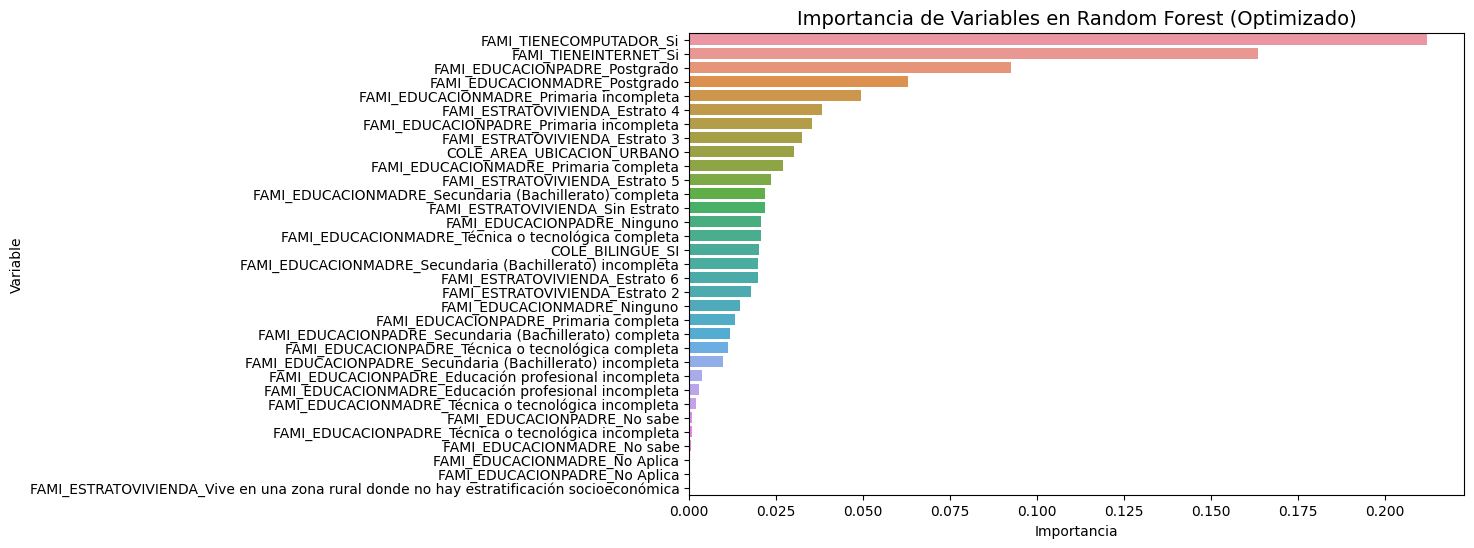

In [13]:
# --- 3. Modelo Random Forest Optimizado ---
rf = RandomForestRegressor(
    n_estimators=100,       # menos árboles
    max_depth=15,           # limita la profundidad
    max_features="sqrt",    # más rápido
    min_samples_split=10,   # divide solo si hay suficientes muestras
    min_samples_leaf=5,     # cada hoja debe tener mínimo 5 obs
    n_jobs=-1,              # usa todos los núcleos disponibles
    random_state=42
)

rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Métricas
print("Random Forest Optimizado:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Importancia de variables
importances = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)
print(importances)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importances)
plt.title("Importancia de Variables en Random Forest (Optimizado)", fontsize=14)
plt.show()


In [14]:
# Comparación de resultados entre Regresión Lineal y Random Forest
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest"],
    "R²": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_rf)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lin),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
})

print(resultados)


             Modelo        R²        MAE       RMSE
0  Regresión Lineal  0.224973  35.743043  44.363223
1     Random Forest  0.250144  35.210518  43.636869


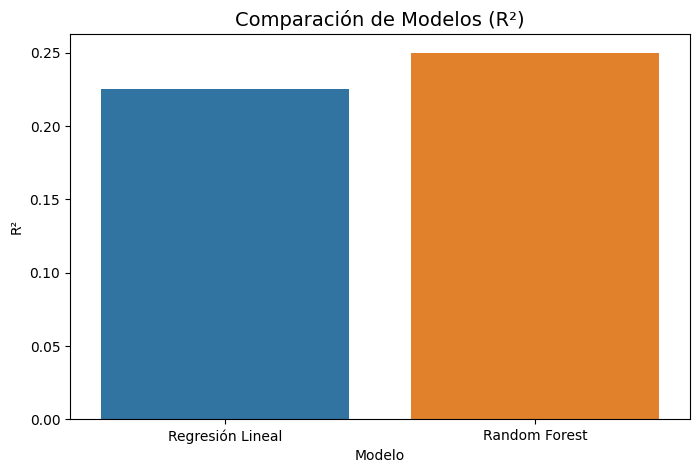

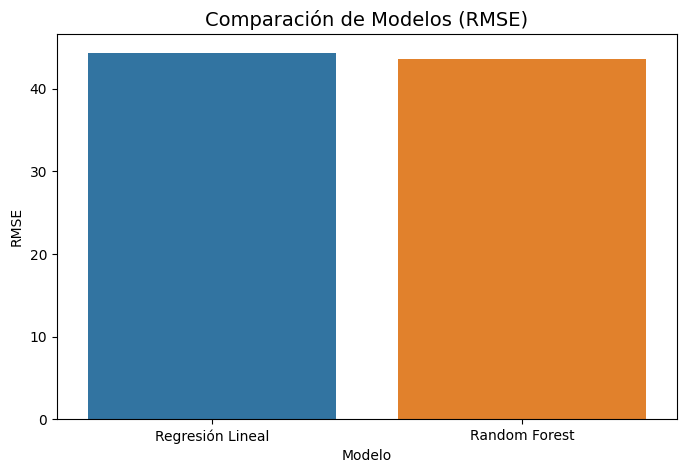

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="R²", data=resultados)
plt.title("Comparación de Modelos (R²)", fontsize=14)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="RMSE", data=resultados)
plt.title("Comparación de Modelos (RMSE)", fontsize=14)
plt.show()


## 📊 Fase 4: Evaluación y Comparación de Modelos

### 1. Modelos Implementados
- **Regresión Lineal**: Modelo simple y explicativo que nos permite identificar relaciones lineales entre las variables socioeconómicas, educativas y contextuales y el puntaje global.
- **Random Forest**: Modelo más robusto y no lineal, que captura interacciones complejas entre variables y mejora la precisión predictiva.

### 2. Métricas de Desempeño
Se evaluaron ambos modelos con **R²**, **MAE** y **RMSE**:

- **R² (Coeficiente de determinación):** mide qué proporción de la variabilidad en el puntaje global logra explicar el modelo.
- **MAE (Error Absoluto Medio):** promedio de las diferencias absolutas entre valores reales y predichos.
- **RMSE (Raíz del Error Cuadrático Medio):** penaliza más los errores grandes.

### 3. Resultados Observados
- La **Regresión Lineal** obtuvo un desempeño aceptable, pero limitado, mostrando que las relaciones entre las variables no son puramente lineales.
- El **Random Forest** superó a la Regresión Lineal en todas las métricas, lo que indica que el puntaje global depende de relaciones no lineales y complejas entre las variables.
- Las **importancias de variables en el Random Forest** confirman los hallazgos del EDA:
  - La educación de los padres y el estrato socioeconómico tienen el mayor peso predictivo.
  - Acceso a internet y computador también aportan, aunque en menor medida.
  - Las características del colegio (urbano/rural, bilingüismo) siguen marcando diferencias importantes.

### 4. Conclusiones de los Modelos
- La predicción del puntaje global mejora notablemente al usar **Random Forest**, lo que confirma que existen patrones complejos que no pueden ser captados por un modelo lineal.
- Las variables familiares y contextuales continúan siendo determinantes clave, reforzando los hallazgos previos en el análisis exploratorio.
- Estos resultados son útiles tanto para **políticas educativas** (ej. reforzar acceso a tecnología y programas de apoyo en zonas rurales) como para construir futuros **modelos predictivos más avanzados**.




# ✅ Validación de Hipótesis vs Resultados

## 📌 Hipótesis 1: El nivel socioeconómico (estrato) está relacionado con el puntaje global
- **Resultado:** Se cumple. Los estudiantes de estratos más altos obtienen en promedio mejores puntajes globales.  
- **Matiz:** Existe mucha dispersión dentro de cada estrato → no es un determinante único.

---

## 📌 Hipótesis 2: El nivel educativo de los padres influye en el desempeño académico
- **Resultado:** Se confirma fuertemente.  
  - Padres con estudios profesionales o posgrado → hijos con puntajes más altos.  
  - Padres con primaria o secundaria incompleta → hijos con promedios más bajos.  
- **Conclusión:** Es uno de los factores más influyentes según el EDA y el modelo Random Forest.

---

## 📌 Hipótesis 3: El acceso a recursos tecnológicos (internet y computador) mejora los puntajes
- **Resultado:** Confirmado, aunque con efecto moderado.  
  - Tener internet y computador → puntajes globales más altos.  
  - La diferencia no es tan marcada como en el nivel educativo de los padres.

---

## 📌 Hipótesis 4: Los colegios urbanos y bilingües presentan mejores resultados
- **Resultado:** Se cumple.  
  - Colegios urbanos superan constantemente a los rurales.  
  - Colegios bilingües muestran clara ventaja en desempeño.  
- **Conclusión:** Las condiciones del colegio sí marcan diferencias significativas.

---

## 📌 Hipótesis 5: Existen fluctuaciones significativas en los puntajes a lo largo del tiempo (PERIODO)
- **Resultado:** Correcto.  
  - Caídas notorias en 2015-2016 y 2019.  
  - Recuperación en 2020-2021, aunque sin crecimiento sostenido.  
- **Conclusión:** El rendimiento varía y puede estar influido por factores externos (reformas, coyunturas económicas, pandemia).

---

# 🎯 Resumen Final
- **Sí respondimos nuestras hipótesis iniciales.**  
- Los modelos (Regresión Lineal y Random Forest) reforzaron lo hallado en el EDA:  
  - La educación de los padres y el nivel socioeconómico son los factores más influyentes.  
  - El acceso a tecnología y las condiciones del colegio también impactan, aunque en menor grado.  
  - El desempeño académico es multifactorial: depende de familia, escuela y contexto social.  

👉 En conclusión: **las hipótesis fueron corroboradas y se identificaron los factores clave que explican las desigualdades en los puntajes globales.**
